# Junction parameters estimation

In [15]:
import scipy.constants as cs
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
import plotting_settings

## Conversion
Here we use the formulas
$$ E_C = \frac{e^2}{2C_\sum} ,$$

$$ E_L = \frac{\phi_0^2}{L},$$
and with $L_J = \phi_0/ I_c$, we can write
$$E_J = \phi_o I_c,$$
where $\phi_o = \hbar/2e$ is the reduced flux quantum, and $I_c$ is the Josephson junction's critical current. The critical current density can be computed via the relation $J_c \times \mathrm{area} = I_c$. For an array of junctions, the inductive energy and the array junction Josephson energy are linked via the simple relation $E_L \times N = E_{JA}$.\\

To convert from joules to Hz, simple divide by the Planck constant.

In [16]:
phi_o = cs.hbar/(2*cs.e)
def charging_energy(junc_area, C_shunt):
    ''' 
    Junction capacitance: roughly 45fF/um^2  
    Input: junc_area in um^2, C_shunt in F
    Output: charging energy in GHz
    '''
    C_J = 45e-15*junc_area #F
    C_sum = C_J+C_shunt
    E_C = cs.e**2/(2*C_sum)/cs.h
    return round(E_C*1e-9,4)

def inductive_energy(inductance):
    '''
    input: inductance in H
    output: inductive energy in GHz
    '''
    E_L = phi_o**2/L/cs.h
    return round(E_L*1e-9,4)

In [17]:
#Small junction
junc_area = 100e-3 * 100e-3 #um^2
C_shunt = 2e-15 #F
E_C = charging_energy(junc_area, C_shunt)
print ('Charging energy E_C = ' +str(E_C) +' GHz')

L = 30e-9
E_J = inductive_energy(L)
print ('Josephnson energy E_J = ' +str(E_J) +' GHz')

Charging energy E_C = 7.9062 GHz
Josephnson energy E_J = 5.4487 GHz


In [18]:
#Array 
ajunc_area = 1*0.4 #um^2
C_shunt = 0
E_Ca = charging_energy(ajunc_area, C_shunt)
print ('Array E_Ca = ' +str(E_C) +' GHz')

L = 47e-9
num_junc = 100
E_L = inductive_energy(L)
E_Ja = E_L*num_junc
print ('Array E_Ja = ' +str(E_Ja) +' GHz')
print ('E_Ja per um^2 = ' +str(E_Ja/ajunc_area) +' GHz')
print ('Inductive energy E_L = ' +str(E_L) +' GHz')

Array E_Ca = 7.9062 GHz
Array E_Ja = 347.79 GHz
E_Ja per um^2 = 869.475 GHz
Inductive energy E_L = 3.4779 GHz


## Chain mode

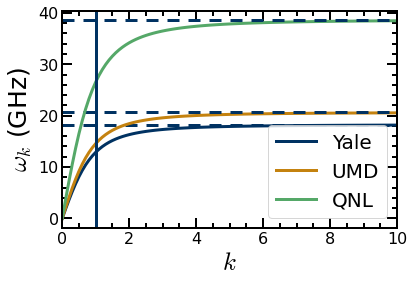

In [19]:
def mode_freq(k,wp,Cg, CJA, N):
    return wp*np.sqrt((1-np.cos(np.pi*k/N))/((1-np.cos(np.pi*k/N))+0.5*Cg/CJA))

k_array = np.linspace(0,10,101)
w = np.zeros_like(k_array)

#Yale design
N = 100
CJA = 40e-15
LJA = 1.9e-9
Cg = 0.04e-15
wp = (LJA*CJA)**(-0.5)
for idx, k in enumerate(k_array):
    w[idx] = mode_freq(k,wp,Cg,CJA,N)/(2*np.pi)*1e-9
plt.plot(k_array,w, label = 'Yale')
plt.axhline(y=wp/(2*np.pi)*1e-9,linestyle = '--')

#UMD design
N = 100
CJA = 36e-15
LJA = 1.65e-9
Cg = 0.036e-15
wp = (LJA*CJA)**(-0.5)
for idx, k in enumerate(k_array):
    w[idx] = mode_freq(k,wp,Cg,CJA,N)/(2*np.pi)*1e-9
plt.plot(k_array,w, label = 'UMD')
plt.axhline(y=wp/(2*np.pi)*1e-9,linestyle = '--')

#Berkeley design
N = 100
CJA = 36e-15
LJA = 0.47e-9
Cg = 0.04e-15
wp = (LJA*CJA)**(-0.5)
for idx, k in enumerate(k_array):
    w[idx] = mode_freq(k,wp,Cg,CJA,N)/(2*np.pi)*1e-9
plt.plot(k_array,w, label = 'QNL')
plt.axhline(y=wp/(2*np.pi)*1e-9,linestyle = '--')

plt.axvline(x=1)
plt.xlim([0,10])
plt.xlabel(r'$k$')
plt.ylabel(r'$\omega_k$ (GHz)')
plt.legend()

## UMD fabrication data

50


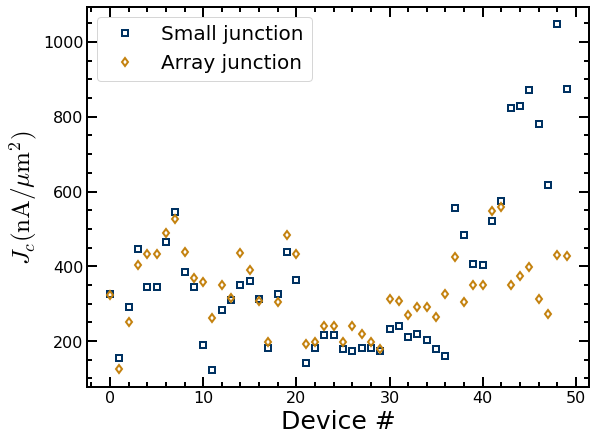

In [20]:
from Devices import UMD
samples = UMD.UMD_devices().list_of_devices

print (len(samples))
E_J_all = np.zeros(len(samples))
E_L_all = np.zeros_like(E_J_all)
E_C_all = np.zeros_like(E_J_all)
juncArea_all = np.zeros_like(E_J_all)
juncNum_all = np.zeros_like(E_J_all)
ajuncArea_all = np.zeros_like(E_J_all)
for idx in range(len(samples)):
    E_J_all[idx] = samples[idx]['E_J']
    E_L_all[idx] = samples[idx]['E_L']
    E_C_all[idx] = samples[idx]['E_C']
    juncArea_all[idx] = samples[idx]['junc_area']*1e-6
    juncNum_all[idx] = samples[idx]['array_junc_num']
    ajuncArea_all[idx] = samples[idx]['array_junc_area']
    
E_J_chain = E_L_all * juncNum_all

#Critical current density
J_o_junc = (E_J_all*1e9*cs.h) / phi_o / juncArea_all
J_o_chain = (E_J_chain*1e9*cs.h) / phi_o / ajuncArea_all
plt.figure(figsize = [9,7])
plt.plot(J_o_junc*1e9, linestyle = 'none', marker='s',markerfacecolor = 'none', markeredgewidth=2, label='Small junction')
plt.plot(J_o_chain*1e9, linestyle = 'none', marker='d',markerfacecolor = 'none', markeredgewidth=2, label='Array junction')
plt.xlabel('Device #')
plt.ylabel('$J_c(\mathrm{nA/\mu m^2})$')
plt.legend()

## Berkeley fabrication data
Current array junction has area $0.2~\mathrm{\mu m}\times 3.96 ~\mathrm{\mu m}$, same as UMD's, but thinner. 45 degree evaporation should bring the area to $0.2~\mathrm{\mu m}\times 3.2 ~\mathrm{\mu m}$. The current spacing between junctions is $500~\mathrm{nm}$, but we can make it $250~\mathrm{nm}$ to have a tightly-packed array. Currently $J_c=670~\mathrm{nA/\mu m^2}$, but normally should be $670~\mathrm{nA/\mu m^2}$

## Phase slip estimation